# Libraries and Data (Turn on GPU)

In [1]:
from google.colab import files
uploaded = files.upload()


Saving data.xlsx to data.xlsx


In [2]:
# Install the darts library
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import ParameterGrid
from darts.timeseries import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel

In [4]:
# load the data
df = pd.read_excel('data.xlsx',index_col='Date',parse_dates=True)



df


,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),turbidity
Date,,,,,,
2020-12-31 15:00:00,4.0,78,9.8,0.391,55,0.430411
2020-12-31 16:00:00,3.4,85,5.6,0.391,25,0.522836
2020-12-31 17:00:00,1.5,94,7.3,0.390,3,0.512069
2020-12-31 18:00:00,0.8,95,7.1,0.389,0,0.450545
2020-12-31 19:00:00,-0.1,97,8.4,0.388,0,0.405494
...,...,...,...,...,...,...
2023-12-30 05:00:00,6.9,90,21.5,0.399,0,0.455236
2023-12-30 06:00:00,6.9,90,21.4,0.399,0,0.398240
2023-12-30 07:00:00,6.7,91,19.0,0.398,0,0.413984


In [5]:
# create lag features
df['relative_humidity_2m (%)_lag3'] = df['relative_humidity_2m (%)'].shift(3)
df['wind_speed_10m (km/h)_lag6'] = df['wind_speed_10m (km/h)'].shift(6)
df['soil_moisture_0_to_7cm (m³/m³)_lag72'] = df['soil_moisture_0_to_7cm (m³/m³)'].shift(72)
df['direct_radiation (W/m²)_lag72'] = df['direct_radiation (W/m²)'].shift(72)

df = df.dropna()

df = df.rename(columns={'turbidity': 'y'})


df.head()

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m (km/h)_lag6,soil_moisture_0_to_7cm (m³/m³)_lag72,direct_radiation (W/m²)_lag72
Date,,,,,,,,,,
2021-01-03 15:00:00,3.6,80,17.2,0.378,31,0.367532,85.0,9.1,0.391,55.0
2021-01-03 16:00:00,3.5,78,16.1,0.377,2,0.439294,80.0,11.5,0.391,25.0
2021-01-03 17:00:00,3.0,77,14.5,0.377,2,0.445193,78.0,13.6,0.390,3.0
2021-01-03 18:00:00,2.7,81,14.9,0.376,0,0.371390,80.0,15.3,0.389,0.0
2021-01-03 19:00:00,2.5,82,16.5,0.376,0,0.366914,78.0,17.9,0.388,0.0


In [6]:
# split the data into train and test data
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# save the train and test data
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')


In [7]:
train_data

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m (km/h)_lag6,soil_moisture_0_to_7cm (m³/m³)_lag72,direct_radiation (W/m²)_lag72
Date,,,,,,,,,,
2021-01-03 15:00:00,3.6,80,17.2,0.378,31,0.367532,85.0,9.1,0.391,55.0
2021-01-03 16:00:00,3.5,78,16.1,0.377,2,0.439294,80.0,11.5,0.391,25.0
2021-01-03 17:00:00,3.0,77,14.5,0.377,2,0.445193,78.0,13.6,0.390,3.0
2021-01-03 18:00:00,2.7,81,14.9,0.376,0,0.371390,80.0,15.3,0.389,0.0
2021-01-03 19:00:00,2.5,82,16.5,0.376,0,0.366914,78.0,17.9,0.388,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-05-26 01:00:00,9.6,82,13.8,0.238,0,0.600299,71.0,13.4,0.260,0.0
2023-05-26 02:00:00,9.1,83,13.2,0.238,0,0.619324,75.0,13.0,0.261,0.0
2023-05-26 03:00:00,8.5,83,13.8,0.238,0,0.622378,79.0,14.7,0.261,0.0


In [8]:
# information about the train data
train_data = pd.read_csv('train_data.csv', index_col='Date', parse_dates=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20943 entries, 2021-01-03 15:00:00 to 2023-05-26 05:00:00
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   temperature_2m (°C)                   20943 non-null  float64
 1   relative_humidity_2m (%)              20943 non-null  int64  
 2   wind_speed_10m (km/h)                 20943 non-null  float64
 3   soil_moisture_0_to_7cm (m³/m³)        20943 non-null  float64
 4   direct_radiation (W/m²)               20943 non-null  int64  
 5   y                                     20943 non-null  float64
 6   relative_humidity_2m (%)_lag3         20943 non-null  float64
 7   wind_speed_10m (km/h)_lag6            20943 non-null  float64
 8   soil_moisture_0_to_7cm (m³/m³)_lag72  20943 non-null  float64
 9   direct_radiation (W/m²)_lag72         20943 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.8 MB


In [9]:
# set the frequency
train_data = train_data.asfreq('h')

In [10]:
# change the time series variable name
train_data = train_data.rename(columns={'turbidity': 'y'})
train_data.head()

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m (km/h)_lag6,soil_moisture_0_to_7cm (m³/m³)_lag72,direct_radiation (W/m²)_lag72
Date,,,,,,,,,,
2021-01-03 15:00:00,3.6,80,17.2,0.378,31,0.367532,85.0,9.1,0.391,55.0
2021-01-03 16:00:00,3.5,78,16.1,0.377,2,0.439294,80.0,11.5,0.391,25.0
2021-01-03 17:00:00,3.0,77,14.5,0.377,2,0.445193,78.0,13.6,0.390,3.0
2021-01-03 18:00:00,2.7,81,14.9,0.376,0,0.371390,80.0,15.3,0.389,0.0
2021-01-03 19:00:00,2.5,82,16.5,0.376,0,0.366914,78.0,17.9,0.388,0.0


# Exploratory data analysis

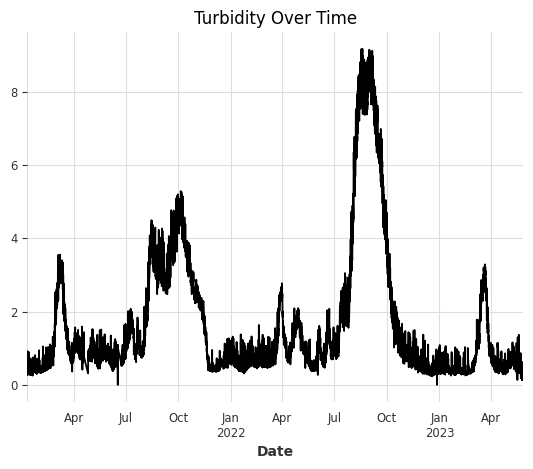

In [26]:
train_data['y'].plot(title='Turbidity Over Time')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

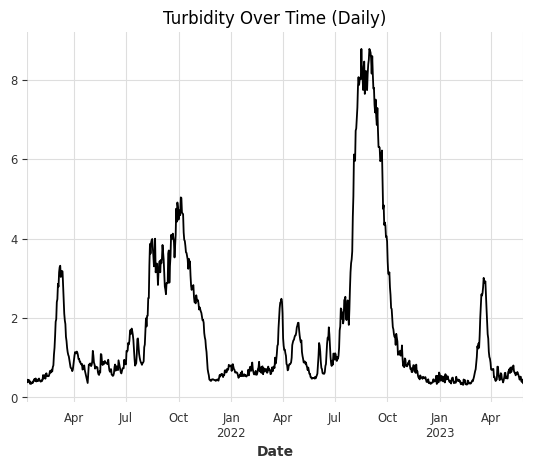

In [27]:
# resample to daily
train_data_daily = pd.DataFrame()
train_data_daily['y'] = train_data['y'].resample('D').mean()
train_data_daily['y'].plot(title='Turbidity Over Time (Daily)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

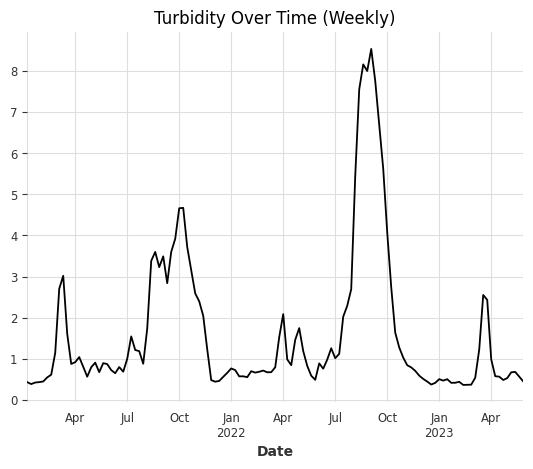

In [28]:
# resample to weekly
train_data_weekly = pd.DataFrame()
train_data_weekly['y'] = train_data['y'].resample('W').mean()
train_data_weekly['y'].plot(title='Turbidity Over Time (Weekly)')
plt.show

<ipython-input-29-0aa614a181e7>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train_data_monthly['y'] = train_data['y'].resample('M').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

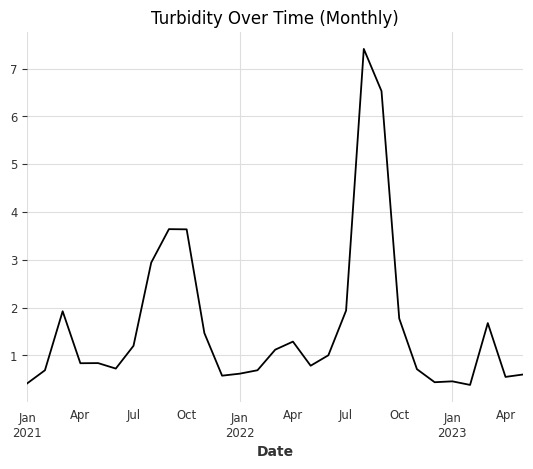

In [29]:
# resample to monthly
train_data_monthly = pd.DataFrame()
train_data_monthly['y'] = train_data['y'].resample('M').mean()
train_data_monthly['y'].plot(title='Turbidity Over Time (Monthly)')
plt.show

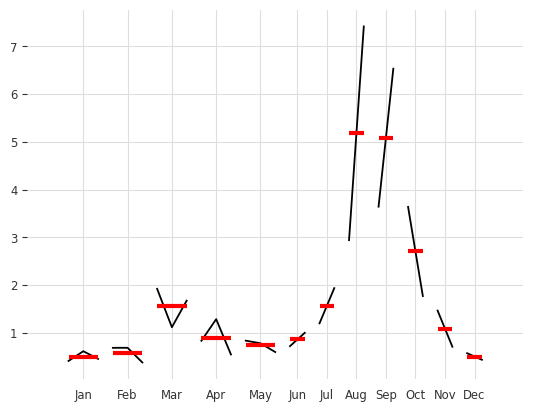

In [30]:
# plot the monthly seasonality
month_plot(train_data_monthly['y'])
plt.show()

<ipython-input-31-0cf1c5e74f0b>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  train_data_quarterly['y'] = train_data['y'].resample('Q').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

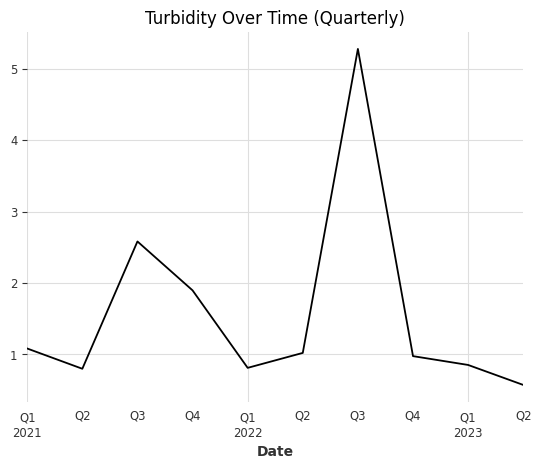

In [31]:
# resample to quarterly
train_data_quarterly = pd.DataFrame()
train_data_quarterly['y'] = train_data['y'].resample('Q').mean()
train_data_quarterly['y'].plot(title='Turbidity Over Time (Quarterly)')
plt.show

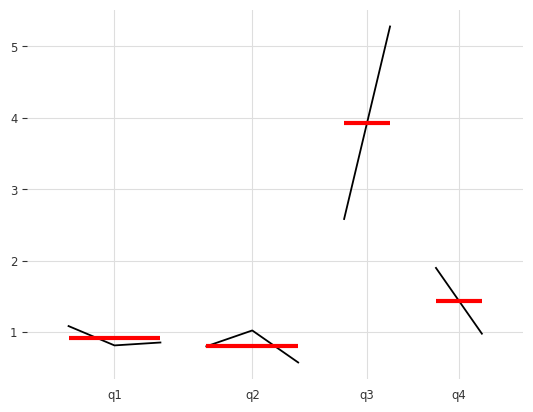

In [32]:
# plot the quarterly seasonality
quarter_plot(train_data_quarterly['y'])
plt.show()

<ipython-input-33-3729d020cb53>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  train_data_yearly['y'] = train_data['y'].resample('Y').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

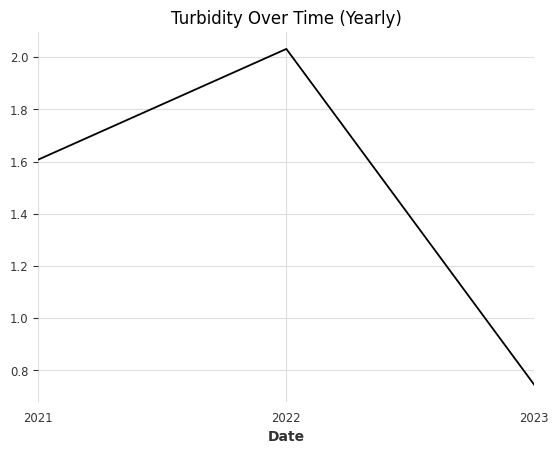

In [33]:
# resample to yearly
train_data_yearly = pd.DataFrame()
train_data_yearly['y'] = train_data['y'].resample('Y').mean()
train_data_yearly['y'].plot(title='Turbidity Over Time (Yearly)')
plt.show

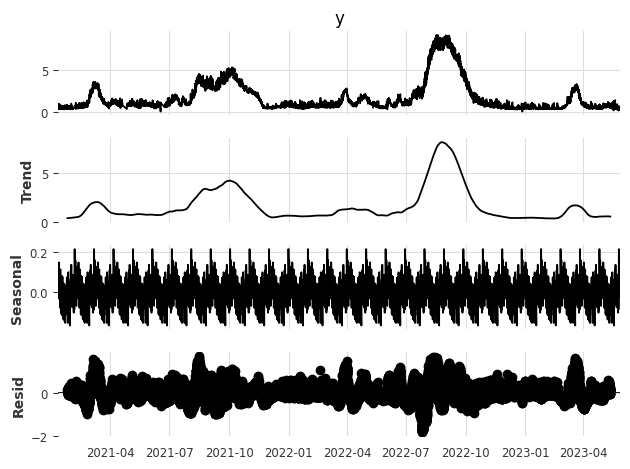

In [34]:
# seasonal decomposition
decomposition = seasonal_decompose(train_data['y'], model='additive', period=30*24)
decomposition.plot()
plt.show()

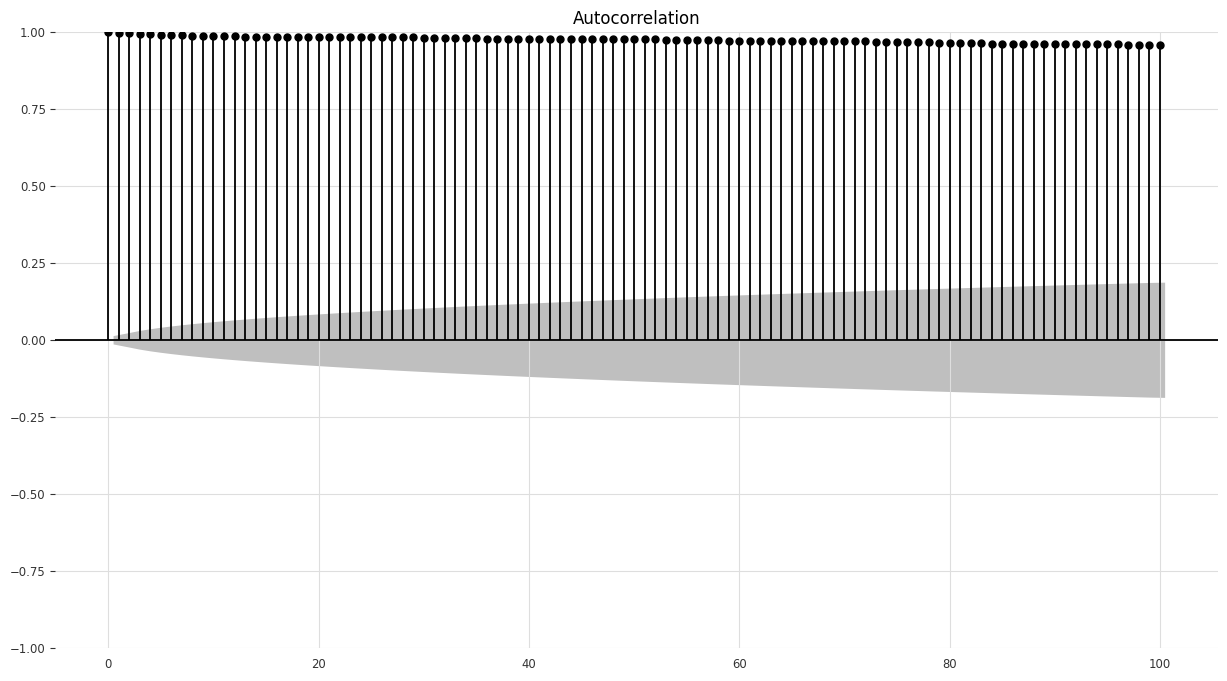

In [35]:
# plot the autocorrelation (ACF)
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(train_data['y'], lags=100, ax=ax)
plt.show()

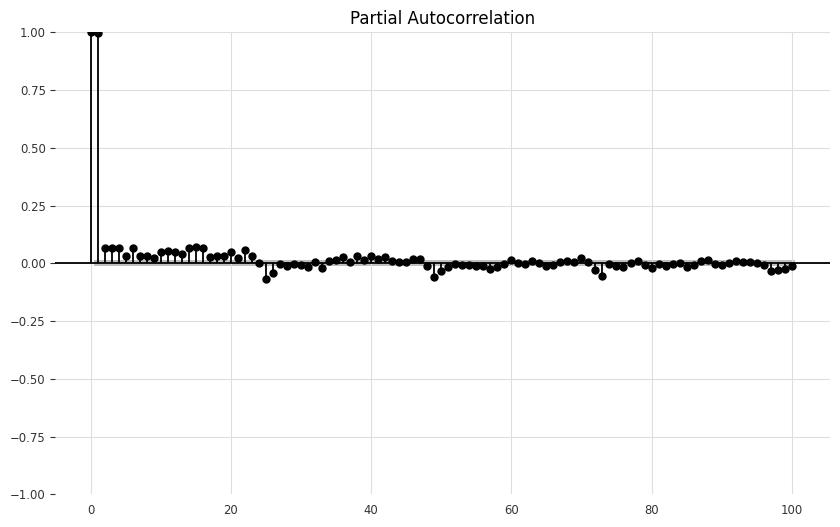

In [36]:
# plot the partial autocorrelation (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(train_data['y'], lags=100, ax=ax)
plt.show()

In [37]:
train_data.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'wind_speed_10m (km/h)', 'soil_moisture_0_to_7cm (m³/m³)',
       'direct_radiation (W/m²)', 'y', 'relative_humidity_2m (%)_lag3',
       'wind_speed_10m (km/h)_lag6', 'soil_moisture_0_to_7cm (m³/m³)_lag72',
       'direct_radiation (W/m²)_lag72'],
      dtype='object')

# prepare for LSTM

In [71]:
# prepare the time series objects
series = TimeSeries.from_series(train_data['y'])
covariate_columns = [
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'wind_speed_10m (km/h)',
    'soil_moisture_0_to_7cm (m³/m³)',
    'direct_radiation (W/m²)',
    'relative_humidity_2m (%)_lag3',
    'wind_speed_10m (km/h)_lag6',
    'soil_moisture_0_to_7cm (m³/m³)_lag72',
    'direct_radiation (W/m²)_lag72'
]
covariates = TimeSeries.from_dataframe(train_data[covariate_columns])

covariates

<TimeSeries (DataArray) (Date: 20943, component: 9, sample: 1)> Size: 2MB
array([[[ 3.6  ],
        [80.   ],
        [17.2  ],
        ...,
        [ 9.1  ],
        [ 0.391],
        [55.   ]],

       [[ 3.5  ],
        [78.   ],
        [16.1  ],
        ...,
        [11.5  ],
        [ 0.391],
        [25.   ]],

       [[ 3.   ],
        [77.   ],
        [14.5  ],
        ...,
...
        ...,
        [14.7  ],
        [ 0.261],
        [ 0.   ]],

       [[ 8.   ],
        [85.   ],
        [13.2  ],
        ...,
        [18.3  ],
        [ 0.261],
        [ 0.   ]],

       [[ 7.5  ],
        [87.   ],
        [13.2  ],
        ...,
        [18.1  ],
        [ 0.261],
        [ 0.   ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 168kB 2021-01-03T15:00:00 ... 2023-05-26...
  * component  (component) <U36 1kB 'temperature_2m (°C)' ... 'direct_radiati...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [72]:
series.start_time()


Timestamp('2021-01-03 15:00:00')

In [73]:
series.freq_str

'h'

In [74]:
train_data.shape[0]

20943

In [75]:
# Year
year_series = datetime_attribute_timeseries(
    pd.date_range(start=series.start_time(), freq=series.freq_str, periods=train_data.shape[0]),
    attribute='year',
    one_hot=False )







In [76]:
# Month
month_series = datetime_attribute_timeseries(year_series,
    attribute='month',
    one_hot=True)

month_series

<TimeSeries (DataArray) (time: 20943, component: 12, sample: 1)> Size: 2MB
array([[[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[1.],
        [0.],
        [0.],
        ...,
...
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])
Coordinates:
  * time       (time) datetime64[ns] 168kB 2021-01-03T15:00:00 ... 2023-05-26...
  * component  (component) <U8 384B 'month_0' 'month_1' ... 'month_11'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [77]:
# scaling
scaler1 = Scaler()
scaler2 = Scaler()


In [78]:
# Apply scaling for the timeseries
y_transformed = scaler1.fit_transform(series)

In [79]:
# scale the covariates
covariates = covariates.stack(year_series)
covariates_transformed = scaler2.fit_transform(covariates)
covariates_transformed = covariates_transformed.stack(month_series)

covariates_transformed

<TimeSeries (DataArray) (Date: 20943, component: 22, sample: 1)> Size: 4MB
array([[[0.27548807],
        [0.75      ],
        [0.35463918],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.27331887],
        [0.725     ],
        [0.33195876],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.26247289],
        [0.7125    ],
        [0.29896907],
        ...,
...
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.37093275],
        [0.8125    ],
        [0.27216495],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.36008677],
        [0.8375    ],
        [0.27216495],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 168kB 2021-01-03T15:00:00 ... 2023-05-26...
  * component  (component) object 176B 'temperature_2m (°C)' ... 'month_11'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [80]:
covariates_transformed_train = covariates_transformed.copy()
covariates_transformed_train

<TimeSeries (DataArray) (Date: 20943, component: 22, sample: 1)> Size: 4MB
array([[[0.27548807],
        [0.75      ],
        [0.35463918],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.27331887],
        [0.725     ],
        [0.33195876],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.26247289],
        [0.7125    ],
        [0.29896907],
        ...,
...
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.37093275],
        [0.8125    ],
        [0.27216495],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.36008677],
        [0.8375    ],
        [0.27216495],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 168kB 2021-01-03T15:00:00 ... 2023-05-26...
  * component  (component) object 176B 'temperature_2m (°C)' ... 'month_11'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

# LSTM model

In [20]:
# define input chunk length
forecasting_horizon = 24*1
input_chunk_length = 24*30
training_length = input_chunk_length + forecasting_horizon

In [21]:
# LSTM model
model = RNNModel(model='LSTM',
            hidden_dim=10,
            n_rnn_layers=2,
            dropout=0.1,
            n_epochs=5,
            optimizer_kwargs = {'lr': 0.003},
            random_state = 42,
            training_length=training_length,
            input_chunk_length=input_chunk_length,
            pl_trainer_kwargs = {'accelerator': 'gpu', 'devices': [0]})


model.fit(y_transformed, future_covariates=covariates_transformed)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


RNNModel(model=LSTM, hidden_dim=10, n_rnn_layers=2, dropout=0.1, training_length=744, n_epochs=5, optimizer_kwargs={'lr': 0.003}, random_state=42, input_chunk_length=720, pl_trainer_kwargs={'accelerator': 'gpu', 'devices': [0]})

# cross-validation

In [22]:
# Cross validation with rolling forecasting window
cv = model.historical_forecasts(series=y_transformed,  # Provide the transformed time series data
                  future_covariates=covariates_transformed,  # Provide the transformed covariates
                  start=0.8,
                    forecast_horizon=forecasting_horizon,
                  stride=24*14,
                  retrain=True,
                  verbose=True,
                     last_points_only=False)


historical forecasts:   0%|          | 0/13 [00:00<?, ?it/s]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
------------------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:   8%|▊         | 1/13 [04:10<50:07, 250.59s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
---------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  15%|█▌        | 2/13 [08:26<46:32, 253.85s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
---------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  23%|██▎       | 3/13 [12:48<42:53, 257.38s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
---------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  31%|███       | 4/13 [17:15<39:09, 261.08s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
---------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  38%|███▊      | 5/13 [21:46<35:19, 264.93s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
---------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  46%|████▌     | 6/13 [26:23<31:22, 268.99s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
---------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  54%|█████▍    | 7/13 [31:05<27:19, 273.32s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
---------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  62%|██████▏   | 8/13 [35:53<23:09, 277.94s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
---------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  69%|██████▉   | 9/13 [40:46<18:50, 282.69s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
---------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  77%|███████▋  | 10/13 [45:45<14:22, 287.50s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
--------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  85%|████████▍ | 11/13 [50:48<09:44, 292.27s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
--------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts:  92%|█████████▏| 12/13 [55:56<04:57, 297.16s/it]INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.3 K  | train
6 | V               | Linear           | 11     | train
--------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

historical forecasts: 100%|██████████| 13/13 [1:01:10<00:00, 282.32s/it]


In [24]:
rmse_cv = []
for i in range(len(cv)):

  # Outcome of the CV
  y_pred_unscaled = scaler1.inverse_transform(cv[i])
  predictions = pd.Series(y_pred_unscaled.values().flatten(), index=y_pred_unscaled.time_index)
  predictions

  # Actuals
  start = predictions.index.min()
  end = predictions.index.max()
  actuals = train_data.loc[start:end, 'y']
  actuals

  # compute the error
  error_cv = np.sqrt(mean_squared_error(actuals, predictions))
  rmse_cv.append(error_cv)


print(np.mean(rmse_cv))

0.17715769916860027


# Parameter tuning

In [31]:
# Parameter Tuning
param_grid = {
    'hidden_dim': [20],
    'n_rnn_layers': [1],
    'dropout': [0.2],
    'lr':[0.005],
    'n_epochs': [5],
    'training-length': [24*90],
    'input-chunk-length': [24*60]
}

grid = ParameterGrid(param_grid)

len(list(grid))




1

In [34]:
# Parameter Tuning loop
rmse_grid = []

for params in grid:
  # Build the model
  model = RNNModel(model='LSTM',
            hidden_dim=params['hidden_dim'],
            n_rnn_layers=params['n_rnn_layers'],
            dropout=params['dropout'],
            n_epochs=params['n_epochs'],
            optimizer_kwargs = {'lr': params['lr']},
            random_state = 42,
            training_length=params['training-length'],
            input_chunk_length=params['input-chunk-length'],
            pl_trainer_kwargs = {'accelerator': 'gpu', 'devices': [0]})


  model.fit(y_transformed, future_covariates=covariates_transformed)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | Metri

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [35]:

  # cross validation with rolling forecasting window
  cv = model.historical_forecasts(series=y_transformed,
                  future_covariates=covariates_transformed,
                  start=0.8,
                  forecast_horizon=forecasting_horizon,
                  stride=24*14,
                  retrain=True,
                  verbose=True,
                     last_points_only=False
            )

  # outcome of the cv
  rmse_cv = []
  for i in range(len(cv)):

    # Outcome of the CV
    y_pred_unscaled = scaler1.inverse_transform(cv[i])
    predictions = pd.Series(y_pred_unscaled.values().flatten(), index=y_pred_unscaled.time_index)



    # Actuals
    start = predictions.index.min()
    end = predictions.index.max()
    actuals = train_data.loc[start:end, 'y']


    # compute the error
    error_cv = np.sqrt(mean_squared_error(actuals, predictions))
    rmse_cv.append(error_cv)



# calculate and store the error
error = np.mean(rmse_cv)
rmse_grid.append(error)


rmse_grid



historical forecasts:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | 

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:   8%|▊         | 1/13 [15:34<3:06:51, 934.28s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  15%|█▌        | 2/13 [31:28<2:53:26, 946.06s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  23%|██▎       | 3/13 [47:45<2:40:02, 960.25s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  31%|███       | 4/13 [1:04:21<2:26:07, 974.16s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  38%|███▊      | 5/13 [1:21:18<2:11:56, 989.57s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  46%|████▌     | 6/13 [1:38:37<1:57:25, 1006.51s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | trai

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  54%|█████▍    | 7/13 [1:56:17<1:42:23, 1023.89s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | trai

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  62%|██████▏   | 8/13 [2:14:19<1:26:52, 1042.48s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | trai

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  69%|██████▉   | 9/13 [2:32:41<1:10:43, 1060.96s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | trai

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  77%|███████▋  | 10/13 [2:51:26<54:02, 1080.72s/it] /usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | trai

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  85%|████████▍ | 11/13 [3:10:36<36:44, 1102.14s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts:  92%|█████████▏| 12/13 [3:30:01<18:41, 1121.06s/it]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


historical forecasts: 100%|██████████| 13/13 [3:49:43<00:00, 1060.27s/it]


In [36]:
# Retrieve the best params
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse_grid
tuning_results

,dropout,hidden_dim,input-chunk-length,lr,n_epochs,n_rnn_layers,training-length,rmse
0,0.2,20,1440,0.005,5,1,2160,0.294814


In [37]:
# Export the params
best_params = tuning_results[tuning_results['rmse']==tuning_results['rmse'].min()]
best_params = best_params.iloc[0,:]
best_params.to_csv('best_params_round1.csv')

# Parameter Round 2

In [ ]:
# Fetch the best params
params_round1 = pd.read_csv('best_params_round1.csv',index_col=0)
params_round1

In [ ]:
# isolate the 3 parameters
n_rnn_layers = int(params_round1.iloc['n_rnn_layers'][0])
hidden_dim = int(params_round1.iloc['hidden_dim'][0])
dropout = float(params_round1.iloc['dropout'][0])


In [ ]:
# Parameter Tuning
param_grid = {
    'hidden_dim': [hidden_dim],
    'n_rnn_layers':[n_rnn_layers],
    'dropout': [dropout],
    'lr':[0.005, 0.01, 0.05],
    'n_epochs': [5, 10, 20],
    'training-length': [24*60, 24*90],
    'input-chunk-length': [24*30, 24*60, 24*90]
}

grid = ParameterGrid(param_grid)

len(list(grid))




NameError: name 'hidden_dim' is not defined

In [ ]:
# Parameter Tuning loop
rmse_grid = []

for params in grid:
  # Build the model
  model = RNNModel(model='LSTM',
            hidden_dim=params['hidden_dim'],
            n_rnn_layers=params['n_rnn_layers'],
            dropout=params['dropout'],
            n_epochs=params['n_epochs'],
            optimizer_kwargs = {'lr': params['lr']},
            random_state = 42,
            training_length=params['training_length'],
            input_chunk_length=params['input_chunk_length'],
            pl_trainer_kwargs = {'accelerator': 'gpu', 'devices': [0]})


  model.fit(y_transformed, future_covariates=covariates_transformed)

  # cross validation with rolling forecasting window
  cv = model.historical_forecasts(series=y_transformed,
                  future_covariates=covariates_transformed,
                  start=0.6,
                  forecast_horizon=forecasting_horizon,
                  stride=24*7,
                  retrain=True,
                  verbose=True,
                     last_points_only=False
            )

  # outcome of the cv
  rmse_cv = []
  for i in range(len(cv)):

    # Outcome of the CV
    predictions = TimeSeries.pd_series(scaler1.inverse_transform(cv[i]))


    # Actuals
    start = predictions.index.min()
    end = predictions.index.max()
    actuals = train_data.loc[start:end, 'y']


    # compute the error
    error_cv = np.sqrt(mean_squared_error(actuals, predictions))
    rmse_cv.append(error_cv)



# calculate and store the error
error = np.mean(rmse_cv)
rmse_grid.append(error)





NameError: name 'grid' is not defined

In [ ]:
# retrieve the best params
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse_grid
tuning_results

In [ ]:
# Export the params
best_params = tuning_results[tuning_results['rmse']==tuning_results['rmse'].min()]
best_params = best_params.iloc[0,:]
best_params.to_csv('best_params_round2.csv')

# Predict the future


In [38]:
# Fetch the best params
params_round1 = pd.read_csv('best_params_round1.csv',index_col=0)
params_round1


,0
dropout,0.200000
hidden_dim,20.000000
input-chunk-length,1440.000000
lr,0.005000
n_epochs,5.000000
n_rnn_layers,1.000000
training-length,2160.000000
rmse,0.294814


In [40]:
# isolate all parameters
n_rnn_layers = int(params_round1.iloc['n_rnn_layers'])
hidden_dim = int(params_round1.iloc['hidden_dim'])
dropout = float(params_round1.iloc['dropout'])
input_chunk_length = int(params_round1.iloc['input_chunk_length'])
lr = params_round1.iloc['lr']
n_epochs = int(params_round1.iloc['n_epochs'])
training_length = int(params_round1.iloc['training_length'])

TypeError: Cannot index by location index with a non-integer key

In [41]:
# isolate all parameters
n_rnn_layers = 1
hidden_dim = 20
dropout = 0.2
input_chunk_length = 1440
lr = 0.005
n_epochs = 5
training_length = 2160

In [42]:
# load test data
test_data = pd.read_csv('test_data.csv', index_col='Date', parse_dates=True)
test_data.asfreq('h')
test_data.head()

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m (km/h)_lag6,soil_moisture_0_to_7cm (m³/m³)_lag72,direct_radiation (W/m²)_lag72
Date,,,,,,,,,,
2023-05-26 06:00:00,8.1,86,14.1,0.239,28,0.422402,83.0,16.6,0.261,0.0
2023-05-26 07:00:00,9.1,82,17.3,0.239,127,0.307034,85.0,13.8,0.261,8.0
2023-05-26 08:00:00,10.5,76,18.1,0.239,270,0.288146,87.0,13.2,0.261,9.0
2023-05-26 09:00:00,12.1,69,17.7,0.238,420,0.280129,86.0,13.8,0.261,4.0
2023-05-26 10:00:00,13.7,64,18.1,0.237,555,0.274884,82.0,13.2,0.260,226.0


In [43]:
X_train = train_data.drop(columns=['y'])
X_test = test_data.drop(columns=['y'])
X = pd.concat([X_train, X_test])


In [44]:
# Convert the combined regressors DataFrame into TimeSeries objects
covariates = TimeSeries.from_dataframe(X)


NameError: name 'test_data_covariates' is not defined

In [45]:
# Create a TimeSeries instances

# Year
year_series = datetime_attribute_timeseries(
    pd.date_range(start = series.start_time(),
                  freq = series.freq_str,
                  periods = X.shape[0]),
                  attribute = "year",
                  one_hot = False)
# Month
month_series = datetime_attribute_timeseries(year_series, attribute = "month", one_hot = True)


In [46]:
# scaling
scaler1 = Scaler()
scaler2 = Scaler()


In [47]:
# apply scaling for the timeseries
y_transformed = scaler1.fit_transform(series)
# covariates_transformed = scaler1.fit_transform(covariates)

In [48]:
# Scale the covariates with additional datetime attributes

# Stack the year_series attribute with the covariates
covariates = covariates.stack(year_series)
# Apply scaling to the covariates
covariates_transformed = scaler2.fit_transform(covariates)
# Stack the month_series attribute with the already scaled covariates
covariates_transformed = covariates_transformed.stack(month_series)

# Display
covariates_transformed

<TimeSeries (DataArray) (Date: 26179, component: 22, sample: 1)> Size: 5MB
array([[[0.27548807],
        [0.75      ],
        [0.32824427],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.27331887],
        [0.725     ],
        [0.30725191],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.26247289],
        [0.7125    ],
        [0.27671756],
        ...,
...
        ...,
        [0.        ],
        [0.        ],
        [1.        ]],

       [[0.34056399],
        [0.9125    ],
        [0.37022901],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]],

       [[0.34056399],
        [0.9125    ],
        [0.37022901],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 209kB 2021-01-03T15:00:00 ... 2023-12-30...
  * component  (component) object 176B 'temperature_2m (°C)' ... 'month_11'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [ ]:
# lstm model
model = RNNModel(model='LSTM',
            hidden_dim=hidden_dim,
            n_rnn_layers=n_rnn_layers,
                 dropout=dropout,
                 n_epochs=n_epochs,
                 optimizer_kwargs = {'lr': lr},
                 random_state = 42,
                 training_length=training_length,
                 input_chunk_length=input_chunk_length,
                 pl_trainer_kwargs = {'accelerator': 'gpu', 'devices': [0]})

model.fit(y_transformed, future_covariates=covariates_transformed)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | Metri

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


RNNModel(model=LSTM, hidden_dim=20, n_rnn_layers=1, dropout=0.2, training_length=2160, n_epochs=5, optimizer_kwargs={'lr': 0.005}, random_state=42, input_chunk_length=1440, pl_trainer_kwargs={'accelerator': 'gpu', 'devices': [0]})

In [ ]:
# predicting the future
predictions = model.predict(n=len(test_data),
              future_covariates=covariates_transformed)





ERROR:darts.utils.data.inference_dataset:ValueError: For the given forecasting horizon `n=5236`, the provided future covariates at dataset index `0` do not extend far enough into the future. As `n > output_chunk_length` the future covariates must end at time step `2023-12-30 09:00:00`, whereas now they end at time step `2023-05-26 05:00:00`.


ValueError: For the given forecasting horizon `n=5236`, the provided future covariates at dataset index `0` do not extend far enough into the future. As `n > output_chunk_length` the future covariates must end at time step `2023-12-30 09:00:00`, whereas now they end at time step `2023-05-26 05:00:00`.

In [83]:
predictions_train = model.predict(n=len(train_data),
              future_covariates=covariates_transformed_train)


ERROR:darts.utils.data.inference_dataset:ValueError: For the given forecasting horizon `n=20943`, the provided future covariates at dataset index `0` do not extend far enough into the future. As `n > output_chunk_length` the future covariates must end at time step `2025-10-14 20:00:00`, whereas now they end at time step `2023-05-26 05:00:00`.


ValueError: For the given forecasting horizon `n=20943`, the provided future covariates at dataset index `0` do not extend far enough into the future. As `n > output_chunk_length` the future covariates must end at time step `2025-10-14 20:00:00`, whereas now they end at time step `2023-05-26 05:00:00`.

In [52]:
y_pred_unscaled = scaler1.inverse_transform(predictions)

In [56]:
predictions = pd.Series(y_pred_unscaled.values().flatten(), index=y_pred_unscaled.time_index)
predictions

predictions

,0
Date,
2023-05-26 06:00:00,0.546952
2023-05-26 07:00:00,0.535456
2023-05-26 08:00:00,0.530488
2023-05-26 09:00:00,0.533625
2023-05-26 10:00:00,0.546033
...,...
2023-12-30 05:00:00,0.286868
2023-12-30 06:00:00,0.283386
2023-12-30 07:00:00,0.279745


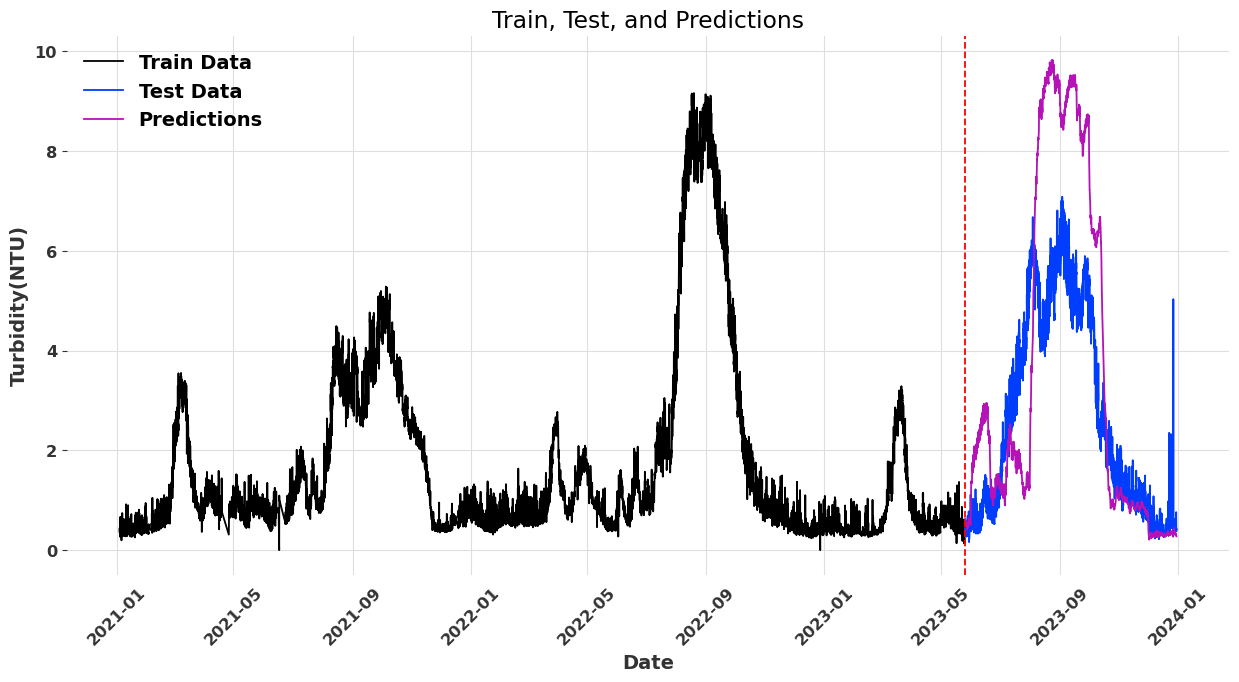

In [69]:
# Highlight the font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
# PLot train data, test data and predictions
plt.figure(figsize=(15, 7))
plt.plot(train_data.index, train_data['y'], label='Train Data')
plt.plot(test_data.index, test_data['y'], label='Test Data')
plt.plot(predictions.index, predictions, label='Predictions')

plt.xticks(rotation=45)
plt.axvline(x=train_data.index[-1], color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Turbidity(NTU)')
plt.title('Train, Test, and Predictions')
plt.legend()
plt.show()



In [70]:
# calculate metrcis for test data
MSE = mean_squared_error(test_data['y'], predictions)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(test_data['y'], predictions)
MAPE = mean_absolute_percentage_error(test_data['y'], predictions)
R2 = r2_score(test_data['y'], predictions)

print('MSE:', MSE)
print('RMSE:', RMSE)
print('MAE:', MAE)
print('MAPE:', MAPE)
print('R2:', R2)

MSE: 5.1849229579228195
RMSE: 2.27704259027424
MAE: 1.659097421494686
MAPE: 0.652513018296056
R2: -0.2528343161674329
